##### Спецкурс "Распознавание образов"
---

### Лабораторная работа 3. Метод потенциальных функций

#### $\S$ 1. Краткая теория.

Рассмотрим случай двух классов $\Omega_{1}$, $\Omega_{2} $. Пусть $\Sigma =\{ (\mathrm{x}_{i}, y_{i} ):~i=1,2,\dots, N\}$, $y_{i} \in \{ -1,1\}$, $i=1,2,\dots, N$ -- обучающая выборка. Обозначим $\Sigma_1 = \{(\mathrm{x}_{i}, y_i)\in \Sigma:~y_i = 1\}$, $\Sigma_2 = \{(\mathrm{x}_{i}, y_i)\in \Sigma :~y_i = -1\}$. Пусть симметрическая функция $K(x,y)$ обладает свойством, что для любого конечного набора вектор-признаков $\mathrm{x}_{1} ,\dots, \mathrm{x}_{m} $ симметрическая матрица $\mathrm{K}$ с элементами $k_{ij} =K(x_{i} ,x_{j} )$ является положительно определенной. Решающую функцию представим в виде

$$
g(\mathrm{x})=U_{1} (\mathrm{x})-U_{2} (\mathrm{x})=\sum\limits_{i=1}^{N}\lambda_{i} K(\mathrm{x}, \mathrm{x}_{i} ) =\left(\lambda, k(\mathrm{x})\right),
$$ 

где $\lambda = \begin{pmatrix} \lambda_{1}& \dots &\lambda_{N}\end{pmatrix}^{T} $, $k(\mathrm{x})=\begin{pmatrix}K(\mathrm{x}, \mathrm{x}_{1})& \dots & K(\mathrm{x}, \mathrm{x}_{N}) \end{pmatrix}^{T} $. Коррекция коэффициентов $\lambda_{i} $ происходит по следующему алгоритму. В начальный момент все веса полагаются равными нулю, поэтому $\lambda^{0} =0$. Далее процесс идет рекуррентно. Если новый объект $(\mathrm{x}_{q+1} ,y_{q+1} )$ обучающей выборки распознается правильно по уже построенным потенциальным функциям, то веса не изменяются. Таким образом, если $y_{q+1} g(\mathrm{x}_{q+1} )=\left(\lambda^{(q)} ,y_{q+1} k(\mathrm{x}_{q+1} )\right)>0$, то $\lambda^{(q+1)} =\lambda^{(q)} $. Если же $y_{q+1} g(\mathrm{x})=\left(\lambda^{(q)} ,y_{q+1} k(\mathrm{x}_{q+1} )\right)\leqslant 0$, то $\lambda_{j}^{(q+1)} =\lambda_{j}^{(q)}$, $j\ne q+1$, $\lambda_{q+1}^{(q+1)} =\lambda_{q+1}^{(q)}+ y_{q+1} $. Итак, можно записать оба случая единым образом

$$
\lambda _{j}^{(q+1)} =\lambda _{j}^{(q)},~~j\ne q+1, \lambda _{q+1}^{(q+1)} =\lambda _{q+1}^{(q)} +h^{(q+1)},
$$ 

где

$$
h^{(q+1)} =\begin{cases} y_{q+1},\quad y_{q+1} g(x_{q+1} )\leqslant 0, \\ 0, \quad y_{q+1} g(x_{q+1} )>0. \end{cases}
$$ 

#### $\S 2$. Двумерное пространство признаков

**Постановка задачи.** Методом потенциальных функций найти области предпочтения классов. В качестве функции $K(\mathrm{x},\mathrm{y})$ выбрать
$$
K(\mathrm{x},\mathrm{y}) = e^{-\alpha\|\mathrm{x} - \mathrm{y}\|^2},
$$
где $\|\cdot\|$ -- евклидова норма и $\alpha > 0$.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
''' Обучающая выборка. '''
m_1 = [0, 0]
m_2 = [3, 3]
sigma_1 = [2, 1]
sigma_2 = [2, 1]
N = 50
X_1 = np.concatenate([np.random.normal(m_1[0], sigma_1[0], N).reshape((-1, 1)),
                      np.random.normal(m_1[1], sigma_1[1], N).reshape((-1, 1))], axis = 1)
X_2 = np.concatenate([np.random.normal(m_2[0], sigma_2[0], N).reshape((-1, 1)),
                      np.random.normal(m_2[1], sigma_2[1], N).reshape((-1, 1))], axis = 1)
Sigma = np.concatenate([X_1, X_2], axis = 0)
Y = np.zeros(Sigma.shape[0])
Y[:N] = 1
Y[N:] = -1
print(Sigma.shape)
print(Y.shape)

(100, 2)
(100,)


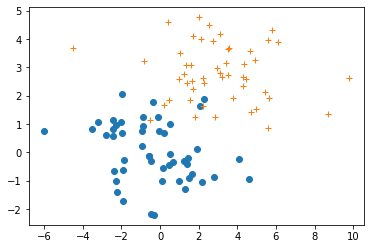

In [4]:
plt.figure()
plt.plot(X_1[:, 0], X_1[:, 1], 'o')
plt.plot(X_2[:, 0], X_2[:, 1], '+')

In [5]:
alpha = 1

In [56]:
def Kernel(x, S):
    d = np.sum((x.reshape((1, -1)) - S) ** 2, axis = 1)
    return np.exp(-d * alpha)

In [57]:
def classifik(x, S, L):
    K = Kernel(x, S)
    return np.sum(K * L)

In [58]:
''' 
Обучение классификатора. S - матрица вектор-признаков. Размер (N x 2)
Y -- вектор меток. Значения 1 и -1. L0 - вектор значений \lambda на итерации 0.
'''
def Learning(S, Y, L0):
    ''' Ваш код
        Er -- Количество ошибочно классифицированных примеров
        L = \lambda  новые значения после одного прохода по выборке (одна эпоха)
    '''
    L = L0
    q = len(S)
    Er = 0
    for i in range(q):
        r = Y[i] * classifik(S[i], S, L)
        if r <= 0:
            L[i] += Y[i]
            Er += 1
    
#     g = np.array(list(map(lambda x: classifik(x, S, L0), S)))
#     h = Y * g
#     print(h)
#     Er = h[h<=0].shape[0]
#     h[h>0]=0
#     L = L0 + h  
#     if  > 0:
#         L = L0
#     else:
#         q = len(S)
#         for i in range(q):
#             if i == q:
#                 L[i] = L0[i] + Y[i]
#             L[i] = L0[i]
#     Er = np.ones(S.shape[0])
    return [L, Er]

In [59]:
Epochs = 5
Learn_x = np.arange(Epochs)
Learn_y = np.zeros(Epochs)
L = np.zeros(Sigma.shape[0])
for t in range(1, Epochs + 1):
    L, Learn_y[t - 1] = Learning(Sigma, Y, L)
    print("Процент ошибок на обучающем наборе: {:.1f}".format((Learn_y[t - 1] / Y.shape[0]) * 100), ' %')

Процент ошибок на обучающем наборе: 2.0  %
Процент ошибок на обучающем наборе: 10.0  %
Процент ошибок на обучающем наборе: 8.0  %
Процент ошибок на обучающем наборе: 5.0  %
Процент ошибок на обучающем наборе: 6.0  %


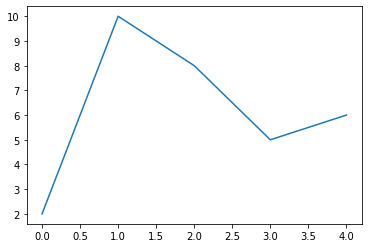

In [60]:
plt.figure()
plt.plot(Learn_x, (Learn_y / Y.shape[0]) * 100)

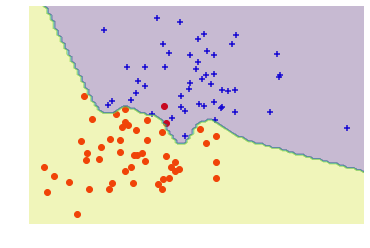

In [10]:
# Строим множества предпочтения классов
plt.figure()
ax = plt.gca()
r = 1 # np.random.uniform(0, 1)
g = 0 #np.random.uniform(0, 1)
b = 0 #np.random.uniform(0, 1)
ax.scatter(X_1[:, 0], X_1[:, 1], marker = 'o', c = [[r, g, b]])
r = 0 #np.random.uniform(0, 1)
g = 0 #np.random.uniform(0, 1)
b = 1 #np.random.uniform(0, 1)
ax.scatter(X_2[:, 0], X_2[:, 1], marker = '+', c = [[r, g, b]])
ax.axis('off')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(*xlim, num = 100), np.linspace(*ylim, num = 100))
d = np.zeros(xx.shape)
for i in range(d.shape[0]):
    for j in range(d.shape[1]):
        x = np.array([[xx[i, j]], [yy[i, j]]])
        d[i, j] = np.sign(classifik(x, Sigma, L)) + 1
ax.contourf(xx, yy, 0.5 * d, alpha = 0.3)

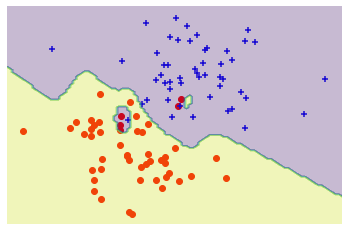

In [61]:
# Строим множества предпочтения классов
plt.figure()
ax = plt.gca()
r = 1 # np.random.uniform(0, 1)
g = 0 #np.random.uniform(0, 1)
b = 0 #np.random.uniform(0, 1)
ax.scatter(X_1[:, 0], X_1[:, 1], marker = 'o', c = [[r, g, b]])
r = 0 #np.random.uniform(0, 1)
g = 0 #np.random.uniform(0, 1)
b = 1 #np.random.uniform(0, 1)
ax.scatter(X_2[:, 0], X_2[:, 1], marker = '+', c = [[r, g, b]])
ax.axis('off')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(*xlim, num = 100), np.linspace(*ylim, num = 100))
d = np.zeros(xx.shape)
for i in range(d.shape[0]):
    for j in range(d.shape[1]):
        x = np.array([[xx[i, j]], [yy[i, j]]])
        d[i, j] = np.sign(classifik(x, Sigma, L)) + 1
ax.contourf(xx, yy, 0.5 * d, alpha = 0.3)

#### $\S$ 3. Распознавание больных молярией.

**Постановка задачи.** Дана обучающая выборка, представленная в файле /Molariya/Data2000.pkl и взятая из https://www.kaggle.com/datasets. Прецеденты представлют собой изображения размера 32x32 пикселя, соответствующие болезни (1000 прецедентов) или ее отсутствию (1000 прецедентов). Используя гистограмму направленных градиентов (HOG) сформировать матрицу размера (2000 x n), содержащую вектор-признаки образов. Методом потенциальных функций построить решающую функцию и оценть точность на тестовой выборке.

#### $\S$ 3.1 Гистограмма направленных градиентов

Гистограмма направленных градиентов -- это техника выделения признаков. Состоит из нескольких шагов:

1. Операция свертывания изображения с помощью двух фильтров, которая приводит к нахождению частных производных изображения. Это могут быть ядра Превитт или Собеля или еще что-либо. Дальше по частным производным определяется градиент изображения в каждом пикселе.

2. Разбивка изображения на ячейки заранее определенного размера и вычисление гистограммы направлений градиентов в каждой из ячеек.

3. Нормализация гистограмм в каждой из ячеек путем сравнения с несколькими ближайшими ячейками.

4. Формирование одномерного вектора-признака из информации по каждой ячейке.


![Image](Molaria/HOG.png)

#### $\S$ 3.2. Гистограмма направленных градиентов в Python \[2\]

In [62]:
from skimage import data, color, feature
import matplotlib.pyplot as plt

In [64]:
image = color.rgb2gray(data.chelsea())
# hog_vec -- это и есть вектор-признаков
hog_vec, hog_vis = feature.hog(image, visualize = True)

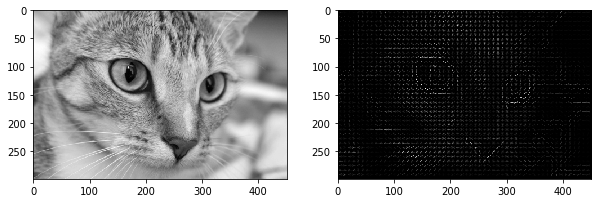

In [65]:
fig = plt.figure(figsize = (10, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.imshow(image, cmap = 'gray')
ax2.imshow(hog_vis, cmap = 'gray')

#### $\S$ 3.3. Построение классификатора для распознавания больных молярией

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import feature          # Здесь Hog
import pickle
from PIL import Image
from sklearn.model_selection import train_test_split
import sklearn
%matplotlib inline

In [67]:
def load_obj(name):
    ''' Чтение из файла.'''
    obj = pickle.load(open(name, 'rb' ))
    return obj

In [68]:
Data = load_obj('Molaria/Data_2000.pkl')
Data.keys()

dict_keys(['Fotka', 'metki'])

In [69]:
Ximage = Data[('Fotka')]
Y = Data[('metki')]
print(Ximage.shape)

(32, 32, 2000)


Изображения при наличии болезни и ее отсутствии:


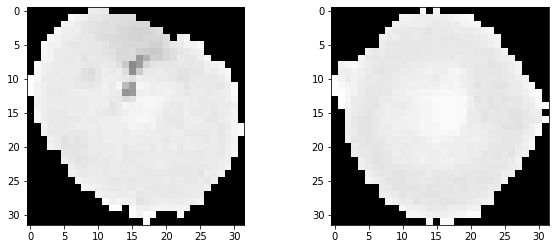

In [70]:
print('Изображения при наличии болезни и ее отсутствии:')
fig = plt.figure(figsize = (10, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.imshow(Image.fromarray(Ximage[:, :, 5]), cmap = 'gray')
ax2.imshow(Image.fromarray(Ximage[:, :, 1000]), cmap = 'gray')

In [74]:
Ximage.shape

(32, 32, 2000)

In [80]:
'''
Формируем массив X, содержащий вектор-признаки HOG и вектор Y, содержащий метки классов 1,  -1 (он уже есть)
Ximage[:, :, :1000] -- больные молярией Y = 1
Ximage[:, :, 1000:] -- здоровые Y = -1
'''
X = np.array([feature.hog(Ximage[:,:,i]) 
              for i in range(Ximage.shape[2])])
print(X.shape)

(2000, 324)


In [81]:
''' Разбиваем выборку на обучающую и тестовую '''
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)
''' Нормализация: среднее равно нуля, дисперсия 1. '''
X_train_scale = sklearn.preprocessing.scale(X_train)
X_test_scale = sklearn.preprocessing.scale(X_test)

In [82]:
alpha = 0.0005 # Это мое значение. Вы можете подобрать свое
def Kernel(x, S):
    d = np.sum((x.reshape((1, -1)) - S) ** 2, axis = 1)
    return np.exp(-d * alpha)

def classifik(x, S, L):
    K = Kernel(x, S)
    return np.sum(K * L)

In [83]:
''' 
Обучение классификатора. S - матрица вектор-признаков. Размер (N x 2)
Y -- вектор меток. Значения 1 и -1. L0 - вектор значений \lambda на итерации 0.
'''
def Learning(S, Y, L0):
    '''Ваш код'''
    L = L0
    q = len(S)
    Er = 0
    for i in range(q):
        r = Y[i] * classifik(S[i], S, L)
        if r <= 0:
            L[i] += Y[i]
            Er += 1
    return [L, Er]

In [84]:
Epochs = 4
Learn_x = np.arange(Epochs)
Learn_y = np.zeros(Epochs)
L = np.zeros(X_train_scale.shape[0])
for t in range(1, Epochs + 1):
    L, Learn_y[t - 1] = Learning(X_train_scale, y_train, L)
    P = (Learn_y[t - 1] / y_train.shape[0]) * 100
    print("Процент ошибок на обучающем наборе: {:.1f}".format(P), ' %')

Процент ошибок на обучающем наборе: 22.6  %
Процент ошибок на обучающем наборе: 17.6  %
Процент ошибок на обучающем наборе: 14.7  %
Процент ошибок на обучающем наборе: 13.8  %


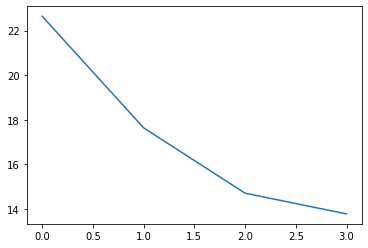

In [85]:
plt.figure()
plt.plot(Learn_x, (Learn_y / y_train.shape[0]) * 100)

In [86]:
''' Точность на обучающей выборке. '''
P = 0
for i in range(X_train_scale.shape[0]):
    x = X_train_scale[i, :]
    y = np.sign(classifik(x, X_train_scale, L))
    if (y == y_train[i]):
        P += 1
print((P / y_train.shape[0]) * 100)

92.0


In [87]:
''' Точность на тестовой выборке. '''
P = 0
for i in range(X_test_scale.shape[0]):
    x = X_test_scale[i, :]
    y = np.sign(classifik(x, X_train_scale, L))
    if (y == y_test[i]):
        P += 1
print((P / y_test.shape[0]) * 100)

88.0


### Литература

1. Айзерман М.А., Браверман Э.М., Розоноэр Л.И. Метод потенциальных функций в теории обучения машин. М.: Наука, 1970.

3. Плас Дж. Вандер. Python для сложных задач: наука о данных и машинное обучение. -- СПб.: Питер. 2018. -- 576 с.